# LENDING CLUB CASE STUDY

### IMPORT LIBRARIES REQUIRED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### IGNORE WARNINGS

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORT THE DATASET

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/AI_Data_Files/loan.csv')
data = pd.read_csv('loan.csv')

# Create a copy of the dataset
data_copy = data.copy()

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## DATA CLEANUP

#### IDENTIFY COLUMNS WITH NULL VALUES

In [5]:
data.isnull().sum().sort_values(ascending = False).head(14)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
dtype: int64

#### REMOVE COLUMNS WITH NULL VALUES

In [6]:
data.dropna(axis = 1, how = 'all', inplace = True)

#### IDENTIFY AND REMOVE COLUMNS WITH ONLY SINGLE VALUES, AS THEY MAY NOT CONTRIBUTE TO ANALYSIS

In [7]:
# Identify columns with only one unique value
single_value_columns = data.columns[data.nunique() == 1]

# Display the columns with single unique values
print("Columns with only a single unique value:")
print(single_value_columns)

Columns with only a single unique value:
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [8]:
# Remove single valued columns
data.drop(single_value_columns,axis = 1, inplace = True)

#### IDENTIFY DUPLICATES IN THE DATASET

In [9]:
row, column = data[data.duplicated()].shape
if row!=0:
    print(f'{row} rows have duplicate data')
else:
    print('No duplicates in the data')

No duplicates in the data


### DATA DICTIONARY OBSERVATIONS

* **"id" , 'member_id', 'url'** have only **unique** values.
* Other observations in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received.
    * **collection_recovery_fee** - post charge off collection fee.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
    * **desc** - Loan description provided by the borrower
    * **mths_since_last_delinq** - The number of months since the borrower's last delinquency
    * **mths_since_last_record** - The number of months since the last public record.
    * **next_pymnt_d** - Next scheduled payment date
    * **pub_rec_bankruptcies** - Number of public record bankruptcies
    * **pub_rec** - Number of derogatory public records
* The **above columns have no contributions** to analysis as they are either **derived post-approval** of loan or contain only unique values   or do not contribute to the analysis.


We shall **remove the above columns**

In [10]:
del_col_list = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d',
           'total_rec_late_fee', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal',
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
           'last_pymnt_amnt','recoveries','earliest_cr_line', 'addr_state','desc','mths_since_last_delinq','mths_since_last_record',
               'next_pymnt_d','pub_rec_bankruptcies','pub_rec']
data.drop(del_col_list,axis = 1, inplace = True)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [11]:
# To find the number of rows and columns
rows, columns = data.shape
print('Rows',rows,'Columns',columns)

Rows 39717 Columns 21


In [12]:
# To display maximum rows and columns which are 21 currently
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 21)

In [13]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'total_pymnt_inv'],
      dtype='object')

### Identify Missing Values

In [14]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_util             0.125891
total_acc              0.000000
total_pymnt_inv        0.000000
dtype: float64

#### Missing Value Treatment
- Missing Values found for emp_lenght and revol_util
- emp_lenght is categorical in nature, we can replace nulls with mode
- The percentage of records with  missing values is very less so we can drop them for revol_util

In [15]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [16]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
total_pymnt_inv        0.0
dtype: float64

In [17]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9,5833.84
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4,1008.71
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10,3005.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37,12231.89
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,15,53.90%,38,3513.33


#### Data format correction

In [18]:
# Remove % suffix from revol_util and int_rate and convert them into numerica data types
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

#### INITIAL TARGET VARIABLE ANALYSIS (LOAN STATUS)

In [19]:
data.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

In [20]:
(data.loan_status.value_counts()/len(data.loan_status))*100

loan_status
Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: count, dtype: float64

### Observations on loan status
- 82% of loans are fully paid
- 14% are charged Off
- Only 3% are current loans

<Axes: xlabel='loan_status', ylabel='count'>

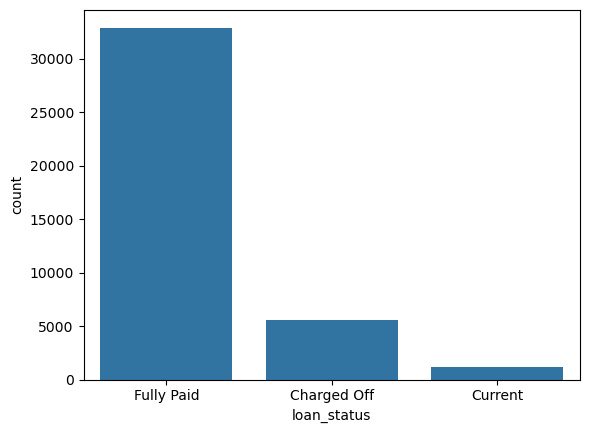

In [21]:
sns.countplot(x = 'loan_status', data = data)

#### Loan status with value 'Current' does not contribute to analysis, so we can remove it

In [22]:
data_bk_latest = data.copy()
data = data[data.loan_status != 'Current']

## Achieved in Cleanup -
1. Removed columns where all values were null 
2. Removed columns where all rows had duplicate values
3. Filled null values for emp_length - by mode
4. Removed columns which were only representing unique IDs
5. Removed columns which ideally are part of post loan approval

### UNIVARIATE ANALYSIS


#### ANNUAL INCOME

<Axes: xlabel='annual_inc'>

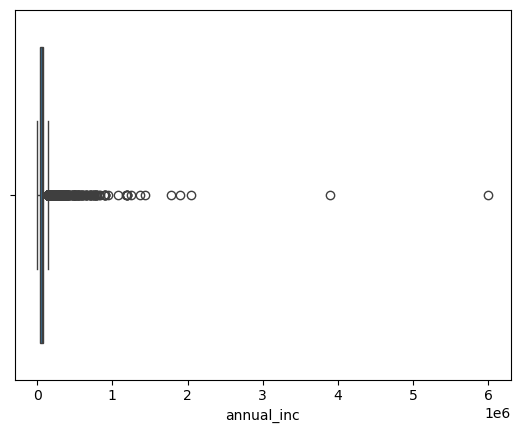

In [23]:
# Create a box plot to identify if there are outliers
sns.boxplot(x=data['annual_inc'])

#### It's clearly visible, that there are some outliers which are distorting the overall analysis, lets remove them


In [24]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [25]:
data.annual_inc.max()

6000000.0

#### As the max annual income value is 60,00,000 and the 99 percentile value is 2,34,997, and there is still signficant increase in salary from 98 percentile to 99 percentile, so we can keep values below 99 percentile to remove the outliers

In [26]:
data_bk_latest = data.copy()
annual_inc_99_perc = data['annual_inc'].quantile(0.99)
data = data[data.annual_inc < annual_inc_99_perc]

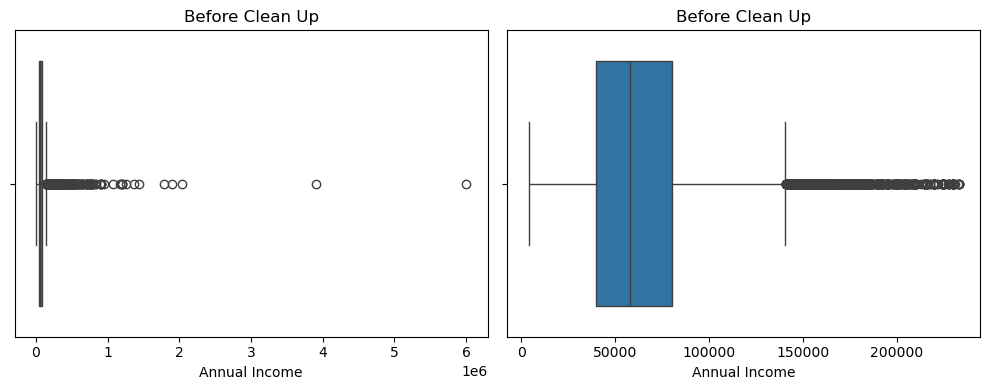

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Plot the distplot on the first subplot
sns.boxplot(x= data_bk_latest.annual_inc, ax=axes[0])
axes[0].set_title("Before Clean Up")
axes[0].set_xlabel("Annual Income")

# Plot the boxplot on the second subplot
sns.boxplot(x=data.annual_inc, ax=axes[1])
axes[1].set_title("Before Clean Up")
axes[1].set_xlabel("Annual Income")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### OBSERVATION : Annual Income had huge outliers which are now removed

#### LOAN AMOUNT

<Axes: xlabel='loan_amnt'>

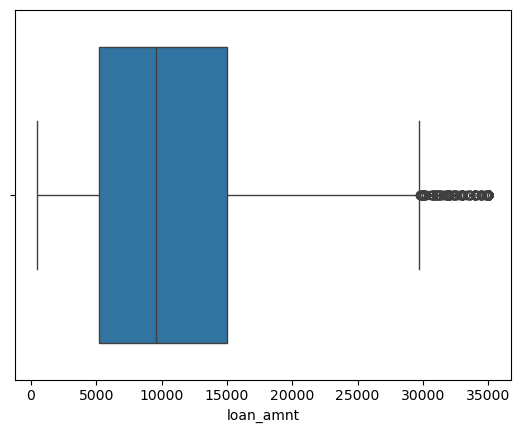

In [28]:
sns.boxplot(x=data.loan_amnt)

In [29]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    15000.0
0.90    21000.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

#### OBSERVATION : Loan amount seems to have continuous values and outlier removal is not necesssary

#### FUND AMOUNT

<Axes: xlabel='funded_amnt'>

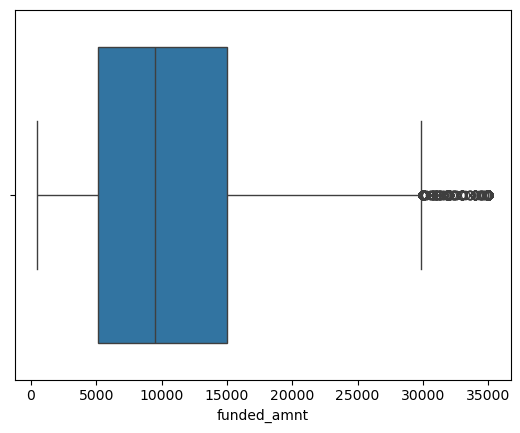

In [30]:
sns.boxplot(x=data.funded_amnt)

In [31]:
data.funded_amnt.quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    15000.00
0.90    20000.00
0.95    25000.00
0.97    25966.75
0.98    30000.00
0.99    35000.00
1.00    35000.00
Name: funded_amnt, dtype: float64

#### OBSERVATION : Fund amount seems to have continuous values and outlier removal is not necesssary

#### INTEREST RATE

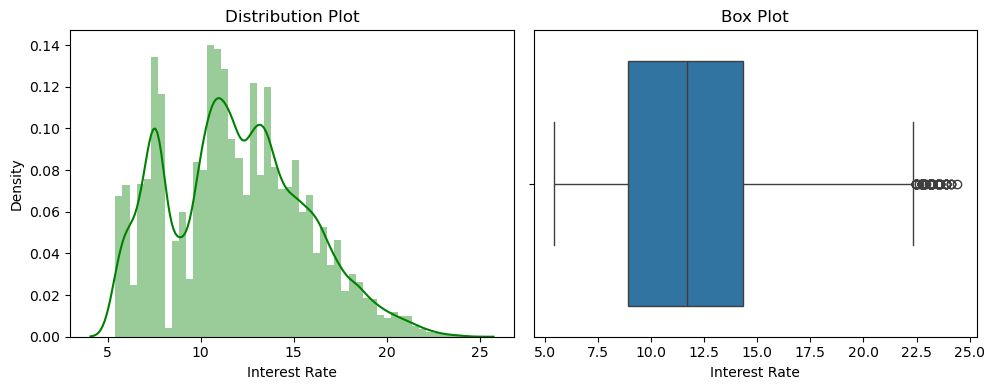

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Plot the distplot on the first subplot
sns.distplot(x=data.int_rate, color='green',kde=True, ax=axes[0])
axes[0].set_title("Distribution Plot")
axes[0].set_xlabel("Interest Rate")

# Plot the boxplot on the second subplot
sns.boxplot(x=data.int_rate, ax=axes[1], orient="h")
axes[1].set_title("Box Plot")
axes[1].set_xlabel("Interest Rate")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### OBSERVATION :
- The average interest rate is 12%, post 75 percentile the interest rate increases greatly
- Most of the borrowers prefer to get loan at interest rate ranging between 9% to 14%

### PURPOSE

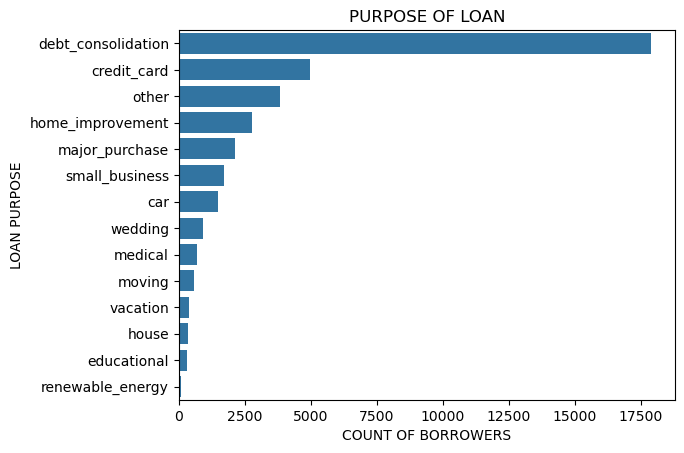

In [33]:
sns.countplot(y=data['purpose'],
                    order=data['purpose'].value_counts().index)
plt.title('PURPOSE OF LOAN')
plt.ylabel('LOAN PURPOSE')
plt.xlabel('COUNT OF BORROWERS')
plt.show()

#### OBSERVATION : Most of the borrowers are taking loans for debt consolidation and credit card bill payment

### HOME OWNERSHIP

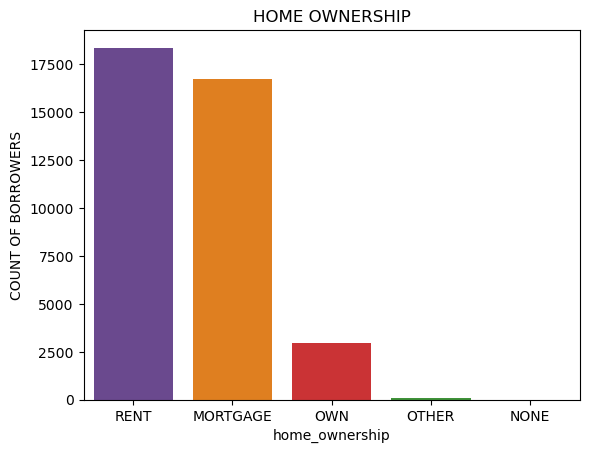

In [34]:
sns.countplot(x=data['home_ownership'],
                    order=data['home_ownership'].value_counts().index,palette='Paired_r')
plt.title('HOME OWNERSHIP')
plt.ylabel('COUNT OF BORROWERS')
plt.show()

#### OBSERVATION - The percentage of Borrowers owning a house is very less

### OBSERVATION SUMMARY - UNIVARIATE ANALYSIS
* Annual Income had outliers in the upper fence which were removed.
* There was a huge jump between 99 and 100 % of data in Annual Income and this was removed.
* The average interest rate is 12% but there is huge jump after 75 percentile.
* Most of the borrowers get interest rate between 9% to 14%.
* Most of the loans are taken for debt consolidation and credit card bill payment.
* Very less percentage of borrowers have their own house
* Outlier presence was not impacting the fund amount and loan amount

### BIVARIATE ANALYSIS
* For Bivaraiate analysis, We will identify patterns of how other variables are influencing/indicating the defaulter behaviour

In [35]:
# Consider charged off data and fully paid data for further analysis for convinience wherever required
defaulter_data = data[data['loan_status'] == 'Charged Off']
fully_paid_data = data[data['loan_status'] == 'Fully Paid']

In [36]:
# Number of rows and columns for defaulters
drows, dcolumns = defaulter_data.shape
print('Rows',drows,'Columns',dcolumns)

Rows 5568 Columns 21


### LOAN STATUS AGAINST EMPLOYEE LENGTH

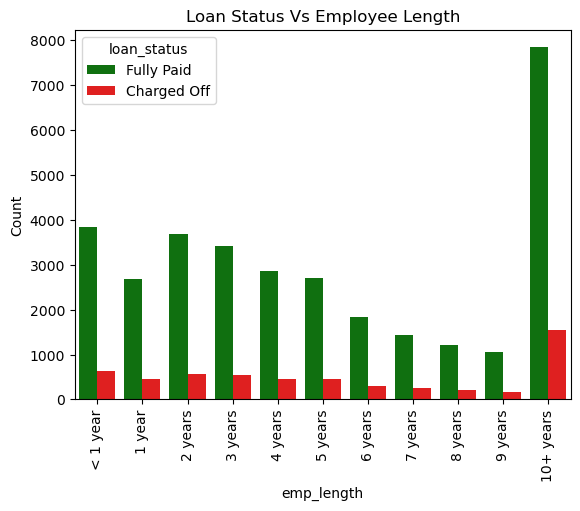

In [37]:
sns.countplot(x=data['emp_length'],
              hue = data['loan_status'],
              order=['< 1 year',  '1 year','2 years','3 years', '4 years',
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'],
              palette=['green', "red"])
plt.title('Loan Status Vs Employee Length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### It seems that both Charged Off and Fully Paid loan status are highest for 10+ years category. Lets identify the ratio of Charged Off against Fully Paid for each employment length


In [38]:
emp_len = data.groupby(by='emp_length').loan_status.value_counts().unstack()
emp_len['Ratio'] = emp_len['Charged Off']/emp_len['Fully Paid']*100
emp_len['Ratio'] = emp_len['Ratio'].apply(lambda x : round(x,2))
emp_len.sort_values(by='Ratio', ascending=False)

loan_status,Charged Off,Fully Paid,Ratio
emp_length,,,
10+ years,1541,7835,19.67
7 years,262,1432,18.30
1 year,452,2685,16.83
5 years,455,2709,16.80
8 years,202,1215,16.63
< 1 year,631,3836,16.45
6 years,303,1845,16.42
3 years,551,3421,16.11
4 years,454,2855,15.90


#### OBSERVATION : For Employment length 10+ years, the charged off customers have increased versus fully paid customers

#### Identifying Correlation of Loan Status against Home Ownership, Verification Status, Purpose and Grade

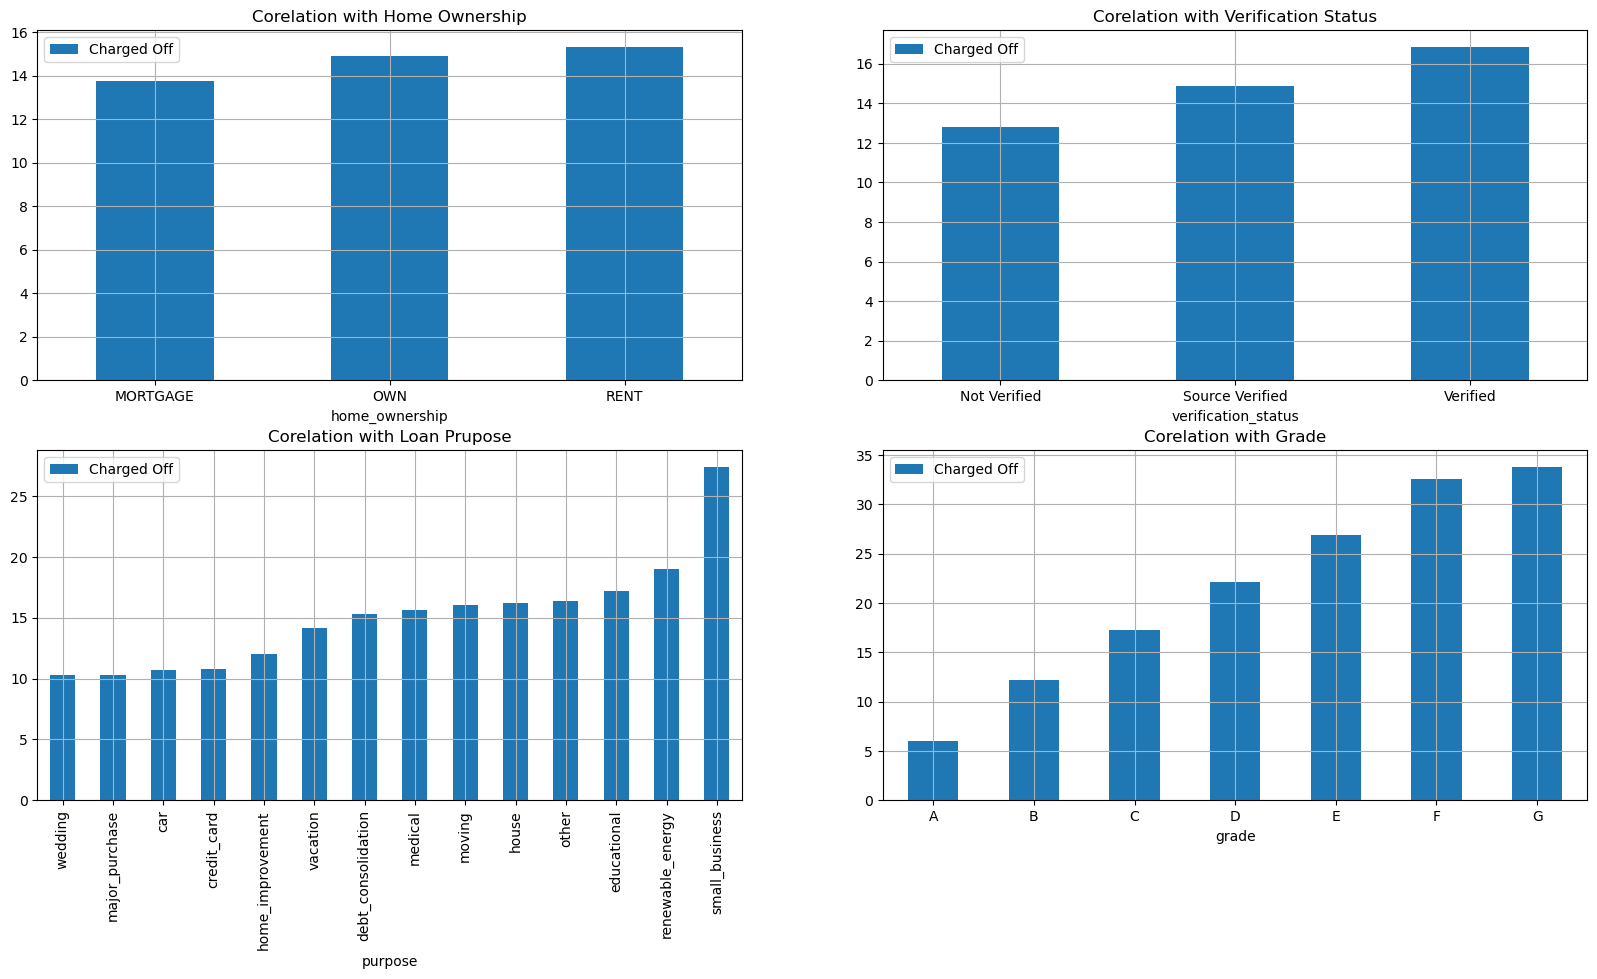

In [40]:
fig, axes = plt.subplots(2, 2,figsize=(20,10))
ax1 = data.groupby('home_ownership').loan_status.value_counts(normalize = True).unstack().T[['MORTGAGE','OWN','RENT']].T['Charged Off'].mul(100).to_frame('Charged Off').dropna().\
plot(kind = 'bar', grid = True, ax = axes[0,0], title = 'Corelation with Home Ownership') # Access column 'Charged Off' instead of index -1
for tick in ax1.get_xticklabels():
    tick.set_rotation(0)

ax2 = data.groupby('verification_status').loan_status.value_counts(normalize = True).unstack()['Charged Off'].mul(100).to_frame('Charged Off').dropna().\
plot(kind = 'bar', grid = True, ax = axes[0,1], title = 'Corelation with Verification Status') # Access column 'Charged Off' instead of index -1
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)


ax3 = data.groupby('purpose').loan_status.value_counts(normalize = True).unstack()['Charged Off'].mul(100).to_frame('Charged Off').dropna().sort_values(by = 'Charged Off').\
plot(kind = 'bar', grid = True, ax = axes[1,0], title = 'Corelation with Loan Prupose') # Access column 'Charged Off' instead of index -1
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

ax4 = data.groupby('grade').loan_status.value_counts(normalize = True).unstack()['Charged Off'].mul(100).to_frame('Charged Off').dropna().\
plot(kind = 'bar', grid = True, ax = axes[1,1], title = 'Corelation with Grade') # Access column 'Charged Off' instead of index -1
for tick in ax4.get_xticklabels():
    tick.set_rotation(0)


#### OBSERVATIONS  -
1. Against home ownership - Percentage of loans getting charged off is slightly higher for "RENT" category
2. Against verification status - Percentage of loans getting charged off are higher for "VERIFIED" category, which is counter intuitive and have to be investigated further
3. In Loan purpose - we see a clear increase in charged off where loan was provided for small businesses
4. In Grade of loan - there is clear trend, which actually shows there is some risk model already in place, which identified charged off loans and put them in high rist (G) category. So, this is not an independent variable but rather outcode of other features

#### Lets analyze verification status against loan amount

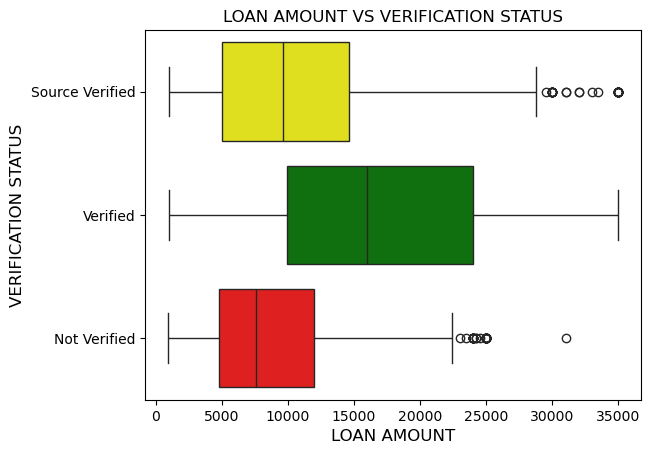

In [41]:
sns.boxplot(x='loan_amnt',
            y='verification_status',
            palette=["yellow", 'green', "red"],
            data=defaulter_data)
plt.xlabel('LOAN AMOUNT', fontsize = 12)
plt.ylabel('VERIFICATION STATUS', fontsize = 12)
plt.title('LOAN AMOUNT VS VERIFICATION STATUS')
plt.show()

#### OBSERVATION :
* While for Verification status as 'Verified' even higher ranges of loan amoun (between 10K to 25K) are getting fully paid, the smaller loan amounts (between 5k to 12K) are getting charged off for 'Not Verified' status. Hence it is risky to even offer small amounts of loans to 'Not Verified' customers

#### Interest Rate against Term for charged Off and Fully Paid Loan status

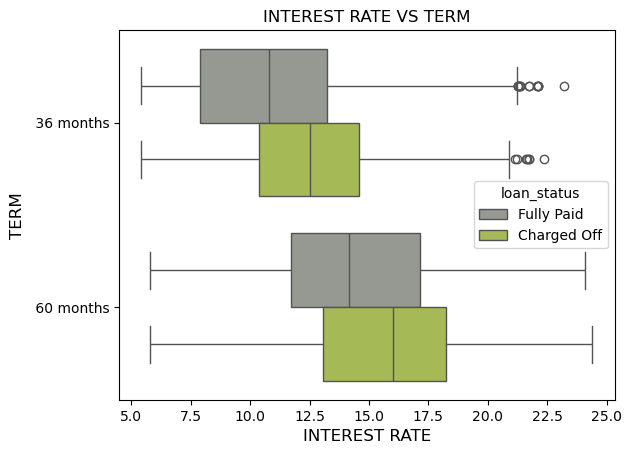

In [42]:
sns.boxplot(x='int_rate',
            y='term',
            palette=['#979A90',"#AECB46"], hue='loan_status',
            data=data)
plt.xlabel('INTEREST RATE', fontsize = 12)
plt.ylabel('TERM', fontsize = 12)
plt.title('INTEREST RATE VS TERM')
plt.show()

#### OBSERVATION :-
* For a term of 36 months, Charged Off customers are majorly found for  interest rate range 10% to 15% while fully paid customers are found with interest rate between 7.5% to 13%
* For a term of 60 months, Charged Off customers are majorly found for interest rate between 13% to 18.5% while fully paid customers are found with interest rate between 11% to 17%
* Overall as the rate of interest increases, the loan defaulters increases. The idealized rate of interests for 36 month and 60 months can be mapped as per fully paid interest rates which are 7.5% to 13% for 36 months and 11% to 17% for 60 months


#### Derived variables : Issue Month and Issue Year

In [43]:
# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

# Extract year and month
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

# Reset the defaulter and fully paid datat post introduction of new dervied variables
defaulter_data = data[data['loan_status'] == 'Charged Off']
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt_inv,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,27.65,1,3,83.7,9,5833.84,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,1.00,5,3,9.4,4,1008.71,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,8.72,2,2,98.5,10,3005.67,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,20.00,1,10,21.0,37,12231.89,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Fully Paid,wedding,11.20,3,9,28.3,12,5632.21,2011,12


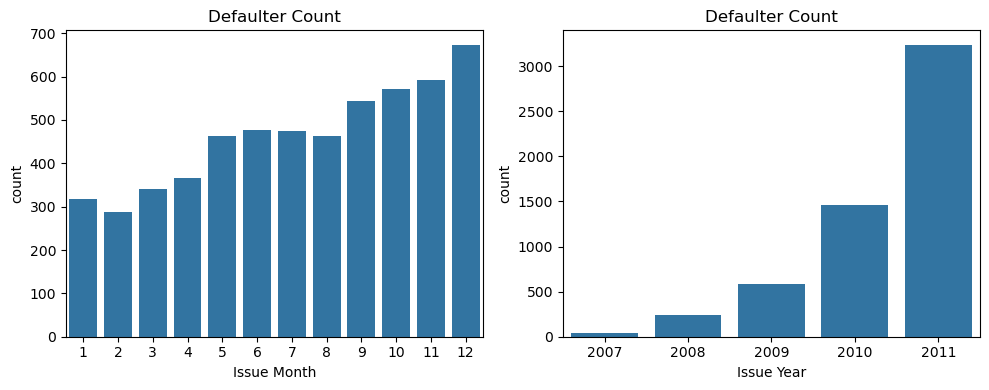

In [44]:
# Plot Defaulter count aginst issue month and issue year
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Plot the distplot on the first subplot
sns.countplot(x='issue_month', data=data[data['loan_status'] == 'Charged Off'],ax=axes[0])
axes[0].set_title("Defaulter Count")
axes[0].set_xlabel("Issue Month")
# Plot the boxplot on the second subplot
sns.countplot(x='issue_year', data=data[data['loan_status'] == 'Charged Off'],ax=axes[1])
axes[1].set_title("Defaulter Count")
axes[1].set_xlabel("Issue Year")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

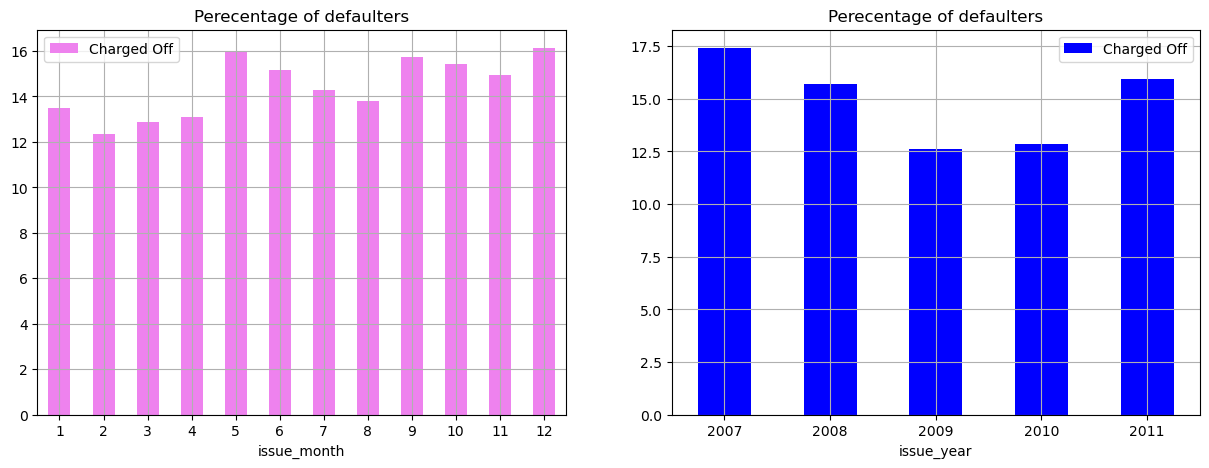

In [50]:
# Plot the percentage ratio of Charged Off agaisnt Fully Paid loans against issue month and issue year
fig, axes = plt.subplots(1, 2,figsize=(1,5))
ax1 = data.groupby('issue_month').loan_status.value_counts(normalize = True).unstack()['Charged Off'].mul(100).to_frame('Charged Off').dropna().\
plot(kind = 'bar', grid = True, ax = axes[0], title = 'Perecentage of defaulters',color = 'violet') # Access column 'Charged Off' instead of index -1
for tick in ax1.get_xticklabels():
    tick.set_rotation(0)

ax2 = data.groupby('issue_year').loan_status.value_counts(normalize = True).unstack()['Charged Off'].mul(100).to_frame('Charged Off').dropna().\
plot(kind = 'bar', grid = True,ax = axes[1], title = 'Perecentage of defaulters',color = 'blue') # Access column 'Charged Off' instead of index -1
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)



#### OBSERVSATION on Issue Month and Issue Year
* The charged off customers are highest in Dec and the year 2011
* The ratio of charged off to Fully Paid loans is highest in the months of June and Dec
* The ratio of Charged Off to Fully Paid loans was highest in 2007 and second highest in 2011

#### OBSERVATION SUMMARY - BIVARIATE ANALYSIS
* Customers are likely to default if the employment length is greater than 10+ years
* Customers with 'RENT' Category of home ownership are likely to default more
* When loan purpose is 'Small Businesses' the charged off customers are highest
* As the loan grade is increasing from A to G, the charged off customers porportion is increasing
* Its risky to offer even small amounts of loans to custoemrs with verification status as 'Not Verified'
* As the Rate of Interest increases, loan defaulters increase.
* For a term of 36 months if the interest range is not between 7.5% to 13% then customers are likely to default
* For a term of 60 months, if the interest range is not between 11% to 17% then customers are likely to default
* Defaulters ratio is highest for loans provided in June and December
* Defaulters were highest in year 2011

#### MULTIVARIATE ANALYSIS

In [51]:
# As Loan Status is categorical variable we want to convert it into numerical one for calculating the correlations
# For loan status fully paid we are allocating positive one value and for Charged Off we are allocating -1 value,
# We had already removed the current loan status from the data
data_corr = data.copy()
data_corr['loan_status'] = np.where(data_corr.loan_status == 'Fully Paid', 1,-1)

In [52]:
# We will now see how loan status is correlated with other variables. A negative correlation would indicate Charge off behaviour
corr_matrix = data_corr.corr(numeric_only=True).round(2)

<Axes: >

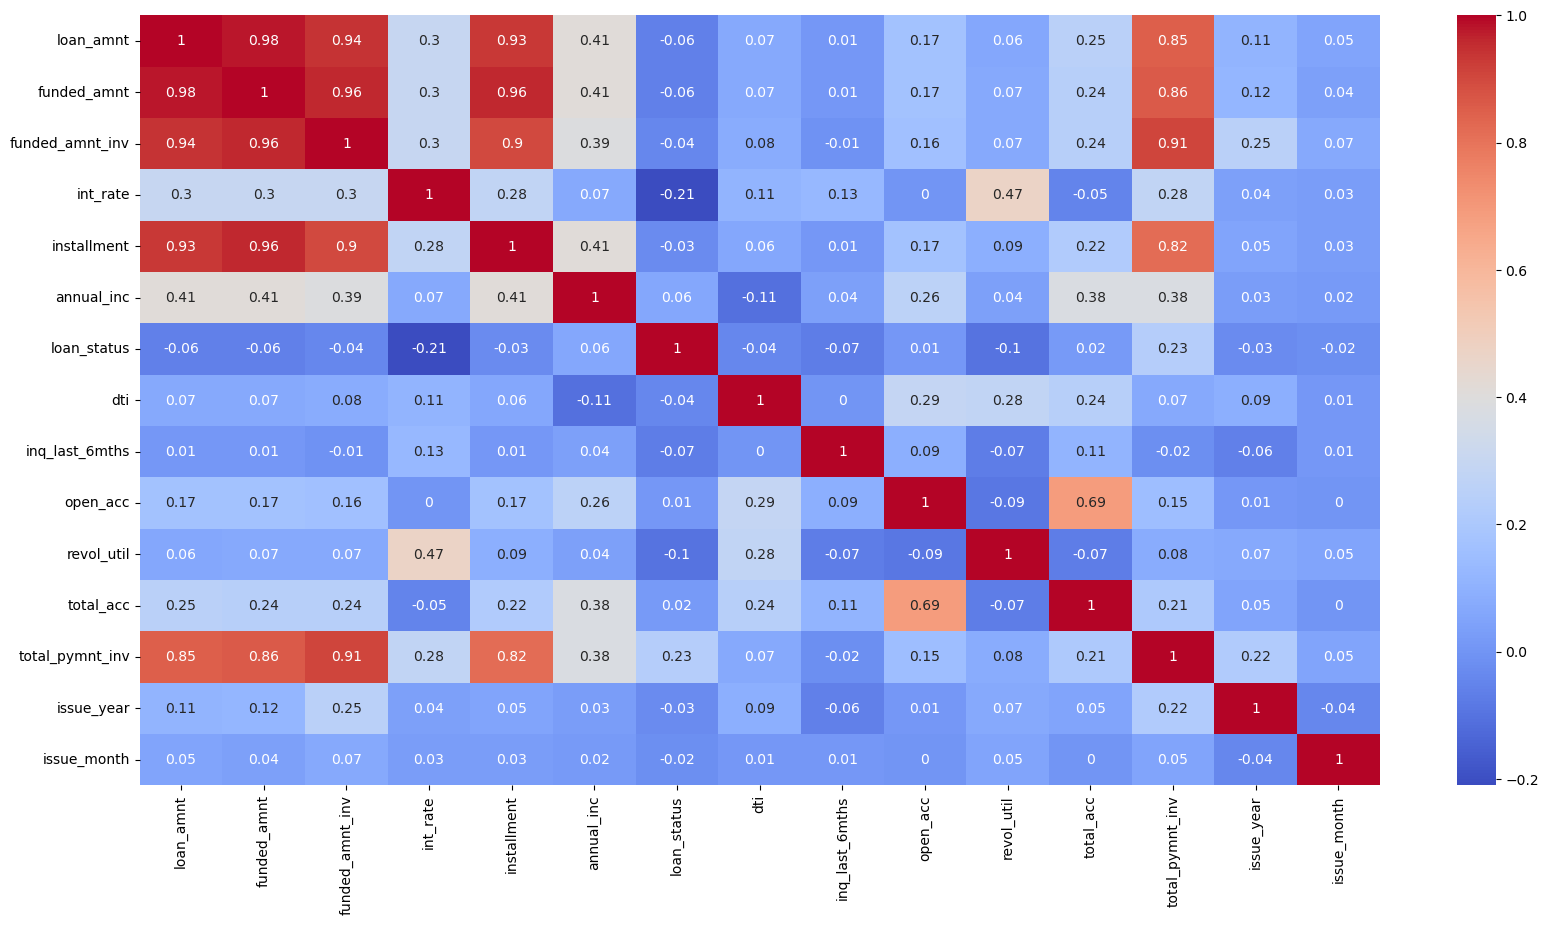

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### OBSERVATION -
* Loan Status is highly negaively correlated with Revolving Line Utilization Rate (revol_util). This is quite obivious as the customer using most of their credit balance elsewhere are likely to default
* Loan Status is highly negaively correlated with Interest rate. The higher the interest rate, the higher the chances of Charge off
* Loan Status is highlyn positively correlated with total_pymnt_inv. This means those who already paid a major portion of their loan are like to fully pay it
* Loan Status is positivelyn correlated with Annual Income. The higher the Income, the more likely the customer is going to pay off the loan


#### FINAl SUMMARY
* Customers are likely to default if the employment length is greater than 10+ years
* Customers with 'RENT' Category of home ownership are likely to default more
* When loan purpose is 'Small Businesses' the charged off customers are highest
* As the loan grade is increasing from A to G, the charged off customers porportion is increasing
* Its risky to offer even small amounts of loans to custoemrs with verification status as 'Not Verified'
* As the Rate of Interest increases, loan defaulters increase.
* For a term of 36 months if the interest range is not between 7.5% to 13% then customers are likely to default
* For a term of 60 months, if the interest range is not between 11% to 17% then customers are likely to default
* Defaulters ratio is highest for loans provided in June and December
* Defaulters were highest in year 2011
* The higher the Revolving Line Utilization Rate, the more likely the customers are going to default
* The higher the Annual Income, the less likely the customers are going to default

